In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the Boston housing dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
boston_df = boston.frame

# Display the first few rows of the dataset
print(boston_df.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
X = boston_df.drop(columns='CRIM')  # Replace 'medv' with the actual target column name in the dataset

# Dependent variable (target)
y = boston_df['CRIM']  # Replace 'medv' with the actual target column name

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
X_train



,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
5,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
116,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04,21.2
45,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21,19.3
16,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
468,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66,19.5
270,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00,21.1
348,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99,24.5
435,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27,13.4


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

# Standardizing the dataset (only input variables, not the output)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the linear regression model
regression = LinearRegression()

# Perform cross-validation
# Use scoring='neg_mean_squared_error' to evaluate the model using MSE
mse_scores = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

# Since cross_val_score returns negative MSE, convert to positive values if needed
mse_scores = -mse_scores

# Optionally, you can print or analyze the MSE scores
print("Mean Squared Error scores from cross-validation:", mse_scores)
print("Average MSE:", mse_scores.mean())

# You can now fit the model if needed
regression.fit(X_train, y_train)

# Predict using the test data
y_pred = regression.predict(X_test)


Mean Squared Error scores from cross-validation: [ 86.61667829  17.89213986  16.53404905 212.54894537   7.74282514
  12.09044541   9.66323869  24.85003435   9.5098114   12.20456408]
Average MSE: 40.9652731637245


In [6]:
#prediction
reg_pred=regression.predict(X_test)
reg_pred

array([ 2.97667017, -0.313409  ,  1.89998274, -0.91270793, 11.76469831,
        2.24331446,  1.18233025,  2.4770197 , 12.46083144,  3.00263066,
        1.76768451,  0.85431046, 14.50532706,  0.71053745,  0.88910743,
        9.73467406,  1.54642003, 13.61839373, -1.07335733, 12.36124004,
       -0.32625834,  1.37058239,  1.46252101, -1.25445476, 12.53512653,
       13.51710618,  0.94308897, 12.5020141 ,  0.1760643 ,  2.01592653,
        2.8269107 , -0.11375126, 14.17715542,  9.63598269, 12.57245479,
        0.59366763, -3.33316346, -0.45447702, -1.20860133, -0.92630818,
        1.71576393,  4.24517019,  0.29270852, -0.06793326,  0.66786172,
       12.3378882 ,  1.74937788, -1.02806921, 11.76761338, -0.34934153,
        1.10910952, -0.12344294,  1.25711176,  0.33134115, -0.40637774,
       10.04903025, 11.29291769,  2.38675565, -0.57731755,  0.70596767,
       -0.27440846, -0.96428203,  1.2364895 , -0.83575682, -3.28969018,
        0.42517355, 13.53012416,  0.05434723,  0.58384452, 12.42

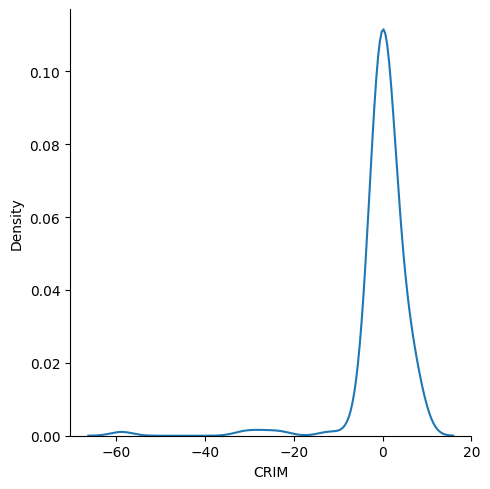

In [7]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [8]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

-0.44022864239230364

In [9]:
#Ridge Regression algorithms
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()
ridge_regressor

Ridge()

In [10]:
parameters={'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [11]:
print(ridgecv.best_params_) 

{'alpha': 5}


In [12]:
print(ridgecv.best_score_)

-40.87144868471941


In [13]:
ridge_pred=ridgecv.predict(X_test)

array([ 2.77479920e+00, -5.57106143e-01,  2.70397314e+00, -9.40465789e-01,
        1.16803650e+01,  2.25939667e+00,  1.24814086e+00,  2.74751794e+00,
        1.21320467e+01,  3.09541979e+00,  1.53943508e+00,  9.12170207e-01,
        1.45514816e+01,  8.56984620e-01,  8.67334596e-01,  9.70430211e+00,
        1.06285941e+00,  1.35190614e+01, -1.16981849e+00,  1.22286327e+01,
       -5.22687357e-01,  1.07757386e+00,  1.65868037e+00, -1.11505701e+00,
        1.23907766e+01,  1.32039031e+01,  1.00240553e+00,  1.25808782e+01,
        1.51078395e-01,  2.18744636e+00,  2.69960468e+00, -1.04794541e-01,
        1.38090989e+01,  9.66751139e+00,  1.24121087e+01,  9.67323381e-01,
       -3.19305615e+00, -4.89344861e-01, -1.14839378e+00, -9.14659037e-01,
        2.00363126e+00,  3.72694946e+00, -5.10640284e-02,  9.75923621e-02,
        6.36441790e-01,  1.21747418e+01,  1.86060237e+00, -1.01813413e+00,
        1.15742650e+01, -2.75843585e-01,  1.08352168e+00, -3.83906918e-01,
        1.40640811e+00,  

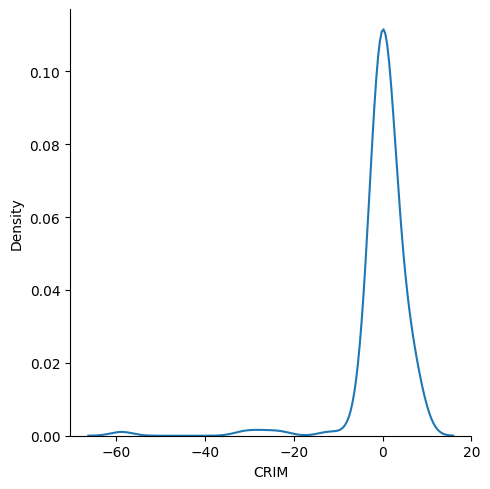

In [14]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [16]:
score=r2_score(reg_pred,y_test)
score

-0.44022864239230364

In [17]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [18]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-43.11993570783221


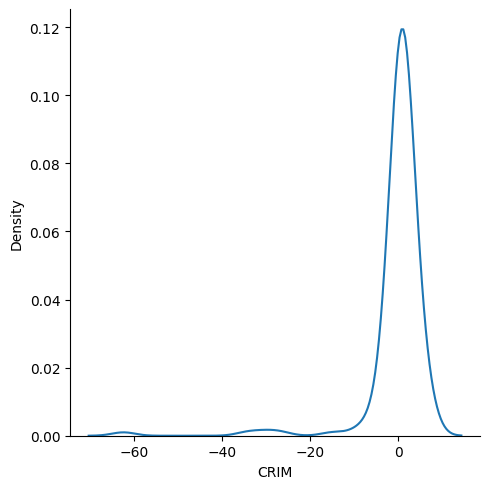

In [19]:
lasso_pred=lassocv.predict(X_test)
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')